In [97]:
import random
import matplotlib.pyplot as plt


In [106]:
cities = ['A', 'B', 'C', 'E', 'M', 'S']

In [107]:
# Represent the Graph as a dictionary of dictionaries
A = {'A':0, 'B':10, 'C':15, 'E':14, 'M':11, 'S':10}
B = {'A':10, 'B':0, 'C':8, 'E':13 ,'M':15 ,'S':9}
C = {'A':15, 'B':8, 'C':0, 'E':11,'M':16,'S':10}
E = {'A':14, 'B':13, 'C':11, 'E':0,'M':9,'S':6}
M = {'A':11, 'B':15, 'C':16, 'E':9,'M':0,'S':9}
S = {'A':10, 'B':9, 'C':10, 'E':6,'M':9,'S':0}
Graph = {'A':A, 'B':B, 'C':C, 'E':E, 'M':M, 'S':S}

In [108]:
# Minimisation problem
# Initialization
MaxIter = 20
EstQuality = 60 # assume the shortest distance possible is 60 



In [109]:
# Compute the total distance travelled to complete a cycle
# start from a city and visit every city and return to the same city
# Input: A path e.g. C-A-M-S-B-E as a list
def total_distance(path):
    distance = 0
    for i in range(1, len(path)):
        # add the distance between two adjacent cities
        distance += Graph.get(path[i-1]).get(path[i])
    
    # finally add the distance to come back to the first city from the last city
    distance += Graph.get(path[i]).get(path[0])
    return distance

# swap neighbourhood structure
# Given a path two randomly chosen cities are swapped 
def swap_neighbour(path):
    two_cities = random.sample(path, 2)
    # find the position of the two cities in the path
    pos_city1 = path.index(two_cities[0])
    pos_city2 = path.index(two_cities[1])
    
    # Now swap the two cities in the path
    new_path = list(path)
    new_path[pos_city1] = two_cities[1]
    new_path[pos_city2] = two_cities[0]
    
    return new_path

In [131]:
# Initial solution construction phase
# Generate an initial solution at random
# Note that the solution is represented as a sequence of cities (a path not a cycle)
sol = random.sample(cities, 6)
fsol = total_distance(sol)
solbest = sol
fsolbest = fsol
LEVEL = fsol
UP = (LEVEL - EstQuality)/MaxIter

# keep a list of fsol and fsolbest for plotting
y_fsol = [fsol]
y_fsolbest = [fsolbest]
print("Iteration: 0, Best solution: " + '-'.join(solbest) + ", Best Fit: " + str(fsolbest))

In [132]:
# Improvement phase
for iteration in range(MaxIter):
    # generate a new solution by a swap neighbourhood structure
    new_sol = swap_neighbour(sol)
    f_new_sol = total_distance(new_sol)
    
    if f_new_sol < fsolbest:
        solbest = new_sol
        fsolbest = f_new_sol
    
    if f_new_sol < LEVEL:
        sol = new_sol
        fsol = f_new_sol
    
    # Add to the list for plotting
    y_fsol.append(fsol)
    y_fsolbest.append(fsolbest)
    
    print("Iteration: " + str(iteration+1) + " Best solution: " + '-'.join(solbest) + " Best Fit: "+str(fsolbest))    
        
    LEVEL -= UP
    

Iteration: 1 Best solution: E-M-C-S-B-A Best Fit: 68
Iteration: 2 Best solution: E-M-C-S-B-A Best Fit: 68
Iteration: 3 Best solution: E-M-C-S-B-A Best Fit: 68
Iteration: 4 Best solution: E-M-C-S-B-A Best Fit: 68
Iteration: 5 Best solution: E-M-S-C-B-A Best Fit: 60
Iteration: 6 Best solution: E-M-S-A-B-C Best Fit: 57
Iteration: 7 Best solution: E-M-S-A-B-C Best Fit: 57
Iteration: 8 Best solution: E-M-S-A-B-C Best Fit: 57
Iteration: 9 Best solution: E-M-S-A-B-C Best Fit: 57
Iteration: 10 Best solution: E-M-S-A-B-C Best Fit: 57
Iteration: 11 Best solution: E-S-C-B-A-M Best Fit: 54
Iteration: 12 Best solution: E-S-C-B-A-M Best Fit: 54
Iteration: 13 Best solution: E-S-C-B-A-M Best Fit: 54
Iteration: 14 Best solution: E-S-C-B-A-M Best Fit: 54
Iteration: 15 Best solution: E-S-C-B-A-M Best Fit: 54
Iteration: 16 Best solution: E-S-C-B-A-M Best Fit: 54
Iteration: 17 Best solution: E-S-C-B-A-M Best Fit: 54
Iteration: 18 Best solution: E-S-C-B-A-M Best Fit: 54
Iteration: 19 Best solution: E-S-C-B-

In [121]:
print("Best solution: " + '-'.join(solbest))
print("Shortest Distance: " + str(fsolbest))

Best solution: ['B', 'C', 'S', 'E', 'M', 'A']
Shortest Distance: 54


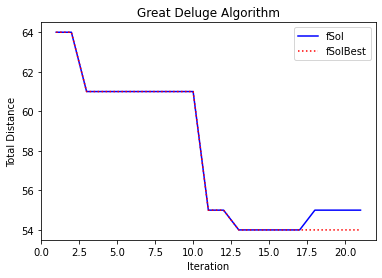

In [122]:
# Plotting in matplotlib
x = range(1, MaxIter+2)
plt.plot(x, y_fsol, 'b', label='fSol')
plt.plot(x, y_fsolbest, ':r', label='fSolBest')
plt.xlabel('Iteration')
plt.ylabel('Total Distance')
plt.title('Great Deluge Algorithm')
plt.legend()
plt.show()